<a href="https://colab.research.google.com/github/camrobertson/FDA_Sentiment_Analysis/blob/Branch-Corpus-Development/PVP_Scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import urllib.parse


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
search_terms = [
                "real world evidence", 
                "RWE", 
                "PFDD", 
                "Patient Focused Drug Development", 
                "Bayesian", 
                "Bayes", 
                "Advanced Trial Design", 
                "Master Protocol",
                "Adaptive Design"
                "Oncology", 
                "Rare",
                "Orphan",
                "Breakthrough",
                "Digital"
]

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'
}

login_data = {
    'user[email]': 'andrew.robertson@sanofi.com',
    'user[password]': 'NecroticSpn43Ac',
    #'utf8': '✓',
    'commit': 'Login'
}

Create Corpus for PVP
1. Mount Google Drive
2. Run search for all documents that have keywords (e.g., "RWE") - see https://www.youtube.com/watch?v=eRSJSKG4mDA 
3. Login to PVP
3. Grab urls for all documents that have keyword; store in dictionary (key = keyword; value = list of urls)
4.  Grab urls 1 by 1; grab date for each
5. Store html files in google drive (folder = PVP, name = PVP + date of doc + hash+.html)

In [0]:
#Step 1 = mount google cloud drive -- need to reset local variables / runtime if you want to re-execute. 

from google.colab import drive
import os
drive.mount('/content/gdrive/')
os.chdir('gdrive/My Drive/FDA_Corpus')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
os.getcwd()

'/content/gdrive/My Drive/FDA_Corpus'

In [0]:
#Cell logs in and grabs stripped text from specific web pages.  
import hashlib
import os



def get_text(redirect):
  with requests.Session() as s:
      url = 'https://www.previsionpolicy.com/login' #will need to tailor this when I start using other sources. 
      r = s.get(url, headers=headers)
      soup = BeautifulSoup(r.content, 'html5lib')
      login_data['authenticity_token'] = soup.find('input', attrs={'name': 'authenticity_token'})['value']
      login_data['redirect'] = redirect
      r = s.post(url, data=login_data, headers=headers)
      return(r)

#Step 3 - Cell will generate a list of urls that result from the PVP search for real world evidence
os.chdir('///content/gdrive//My Drive/FDA_Corpus/PVP')
urls = []
file_hash = hashlib.md5() # Create the hash object, can use something other than `.sha256()` if you wish
file_count = {}

#search_terms = ["RWE"] #Delete this --- only for trouble shooting so that I'm not doing tons of terms. 

for query in search_terms:
  print ('\n\n', query.upper(), '\n')
  term_query = urllib.parse.quote_plus(query)
  redirect_list = []
  
  #run the search on the news page to get all the necessary links, create a list "urls" that will be used as the redirects
  for i in range(0,20):
    with requests.Session() as s:
      url = 'https://www.previsionpolicy.com/pages?utf8=%E2%9C%93&search="'+term_query+'"+NOT+%22Clips%22&commit=&page='+str(i)
      r = s.get(url, headers=headers)
      
      soup = BeautifulSoup(r.content, "html5lib")
          
      for t in soup.find_all('a'):
        if len(t.get('href')) > 35: redirect_list.append(t.get('href'))  #to help weed out the other links
  
  #use each of the links in list "urls", get the text content, get the hash of the text, and save to file w/ hash in folder of search term. 
  
  if not os.path.exists(query):
    os.mkdir(query)
    print("Directory " , query ,  " Created ")
  else:    
    print("Directory " , query ,  " already exists")

  os.chdir(query)  
  
  for u in redirect_list: 
    page_content = get_text(u).content #to modify ... need to keep the get_text call, but ... will replace with the write file. look for tag "meta content" to get date
    md5 = hashlib.md5() # Create the hash object using md5
    md5.update(page_content) # should modify to be sure that it doesn't overrun the buffer size. 
    file_name = str(format(md5.hexdigest()))+'.html'
   
    if not os.path.isfile(file_name):
      f= open(file_name,'w+')
      f.write(str(page_content))
      f.close()
      print("Wrote "+file_name+" Size: "+str(os.stat(file_name).st_size))

      if query in file_count.keys(): 
        file_count[query] += 1
      else:
        file_count[query] = 1
  os.chdir('///content/gdrive//My Drive/FDA_Corpus/PVP')


os.chdir('///content/gdrive//My Drive/FDA_Corpus/PVP')

print("\n\nSUMMARY\n Key   #Files")
tot_count = 0
for q, n in file_count.items():
  print(q, n)
  tot_count += n

print("\nTOTAL FILES = ", tot_count)

# WORKS WORKS ... next step is to write each html to a file labeled w/ date and hash. 




 REAL WORLD EVIDENCE 

Directory  real world evidence  Created 
Wrote 74429091a18ce539a3da07f9b439b329.html Size: 31982
Wrote da22eadf3a85f0b374906bcf9bfd0359.html Size: 24342
Wrote 9c743917041153ab27382929b24cb6af.html Size: 20000
Wrote 035fa92a6a231be1642e73c05a57c8bc.html Size: 31957
Wrote b0ead65573216287eb2d406ac36a6f43.html Size: 32284
Wrote 34662d3df15c89b7af73919812576005.html Size: 25279
Wrote d1a8a5d96d32549279c0312689745710.html Size: 17886
Wrote 8a66603e29831c4fe7e979e6f7278942.html Size: 22369
Wrote 9838fef80ec7660f1a1053175f0c3f74.html Size: 45782
Wrote fa8101630ab3fa07c6e629eedba06d38.html Size: 19127
Wrote ca98e162bf8aee05f99561aad933de6c.html Size: 25369
Wrote 4897e01840780b47e790b1068445eadd.html Size: 19180
Wrote 9b1673a45d4f3beed4a67f6f9266c4fa.html Size: 24905
Wrote fdec28ff47f15578860d4f88a651b584.html Size: 21978
Wrote a896dbeb9bca612f77c31771534f395e.html Size: 24789
Wrote 6081b969db24e14126fdee47cfeb2fdc.html Size: 31690
Wrote a1d38a94a3909ca9f925cec46913833d

In [0]:
os.chdir('///content/gdrive//My Drive/FDA_Corpus')

In [0]:
os.getcwd()


'/content/gdrive/My Drive/FDA_Corpus'

In [0]:
import urllib.parse
query = 'Hellö Wörld@Python'
urllib.parse.quote_plus(query)

For output ... considering developing a class object. Would have the following:
 
 - Document Date
 - Document Name (Hashtag?)
 - Paragraph number
 - FDA Tags -- Type Dictionary; keys would be the FDA list of trigger words (FDA, Temple, Woodcock, etc.), value would be the number of occurances.
 - Keyword tags -- Type Dictionary; keys would be the keywords (RWE, PFDD, etc) value would be the number of occurances.
 - Pos_score - identifies number of positive phrases used. 
 - Neg_score - identifies number of negative phrases used. *
 *alternatively, just have a pos/minus for each paragraph token. 



In [0]:
class Para_Analasys:
  Doc_date = ""
  Doc_Name = ""
  Para_num = ""
  FDA_Tags = {}
  Keywd_Tags = {}
  Sent_score = 0

In [0]:
#Try HTML Corpus Reader from Applied Text Analysis (p. 32)
from nltk.corpus.reader.api import CorpusReader 
from nltk.corpus.reader.api import CategorizedCorpusReader

CAT_PATTERN = r'([a-z_\s]+)/.*' 
DOC_PATTERN = r'(?!\.)[a-z_\s]+/[a-f0-9]+\.json' 
TAGS = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'p', 'li']

class HTMLCorpusReader(CategorizedCorpusReader, CorpusReader):    
  """    A corpus reader for raw HTML documents to enable preprocessing.    """
  def __init__(self, root, fileids=DOC_PATTERN, encoding='utf8',tags=TAGS, **kwargs):        
    """        Initialize the corpus reader.  Categorization arguments     
    (``cat_pattern``, ``cat_map``, and ``cat_file``) are passed to        
    the ``CategorizedCorpusReader`` constructor.  The remaining        
    arguments are passed to the ``CorpusReader`` constructor.        """
           
    # Add the default category pattern if not passed into the class.        
    if not any(key.startswith('cat_') for key in kwargs.keys()):            
      kwargs['cat_pattern'] = CAT_PATTERN
        
      # Initialize the NLTK corpus reader objects        
      CategorizedCorpusReader.__init__(self, kwargs)        
      CorpusReader.__init__(self, root, fileids, encoding)

       # Save the tags that we specifically want to extract.        
      self.tags = tags

  def resolve(self, fileids, categories):        
    """ Returns a list of fileids or categories depending on what is passed
    to each internal corpus reader function. Implemented similarly to        
    the NLTK ``CategorizedPlaintextCorpusReader``.        """
    if fileids is not None and categories is not None:            
      raise ValueError("Specify fileids or categories, not both")
   
    if categories is not None:            
      return self.fileids(categories)        
    
    return fileids

import codecs
  def docs(self, fileids=None, categories=None)
  """
  Returns teh complete text of an HTML document,
  closing the document after we are done reading it and yielding it in a 
  memory safe fashion
  """

  #Resolve the fileids and the categories
  fileids = self.resolve(fileids, categories)

  #Create a generator, loading one document into memory at a time.
  for path, encoding in self.abspaths(fileids, include_encoding=True):
    with codecs.open(path, 'r', encoding=encoding) as f:
      yield f.read()


In [0]:
r = get_text()
print (r.content)

In [0]:
#sandbox - trying to split html into paragraphs --- THIS WORKS -- should help split HTML into paragraphs to allow for word analysis. 
r = get_text()

soup = BeautifulSoup(r.content, "html5lib")
paragraphs = []
tags = soup.find_all('p')
for t in tags: paragraphs.append(t.text)

print(paragraphs)

['\nYou have not saved any research notes.\n', 'To save a note, click the bookmark icon at the top of the article. Notes you flag will appear in this box.', 'A Bipartisan Policy Center report developed by three former FDA commissioners suggests a more active role by the Centers for Medicare & Medicaid Services could be critical to advancing the adoption of real-world evidence in drug regulation and reimbursement.', 'The August report is co-signed by Robert Califf, Andrew von Eschenbach and Mark McClellan, and is intended to “explore the benefits and challenges of using real-world data and evidence to inform regulatory and value-based payment decision-making and the policy actions needed to accelerate their use.” It follows up on the significant attention RWE received in the context of the 21st Century Cures and FDA Reauthorization Act legislation in 2016-2017.', 'Broadly speaking, the message from the report about FDA’s role is to keep moving on current activities to advance RWE. But w

In [0]:
#WORKS - gets the hash of each document read in from the internet. 

import hashlib

file_hash = hashlib.md5() # Create the hash object, can use something other than `.sha256()` if you wish
file_hash.update(r.content)
print (file_hash.hexdigest()) # Get the hexadecimal digest of the hash

Need to work on 1 paragraph at a time.  For each, do the following:
- record the date and hash of the overarching document
- record paragraph number
- tokenize paragraph by sentance; remove stopwords
- identify if FDA identifier is present, and if keyword identifier is present.
- Score positive words; score negative words on sentance by sentance basis.  

In [0]:
#tokenize using string split commands ... early attempt, should be deprioritized for NLTK
r = get_text()
soup = BeautifulSoup(r.content, "html5lib")
text = soup.get_text(strip=True)


tokens = [t for t in text.split()]
clean_tokens = tokens[:] #will generate a tokens library w/out stop words in english
sr = stopwords.words('english')
for token in tokens:
    if token in sr: clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
for key, val in freq.items():
    print(str(key) + ':' + str(val))

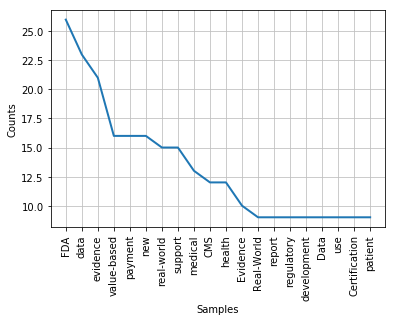

In [0]:
freq.plot(20, cumulative = False)

In [0]:
#uses NLTK to tokenize. 
from nltk import TextTilingTokenizer
tt = TextTilingTokenizer()

r = get_text()
soup = BeautifulSoup(r.content, "html5lib")
text = soup.get_text(strip=True)
s, ss, d, b = tt.tokenize(text)
